# 9-2. 모델 크기 조절

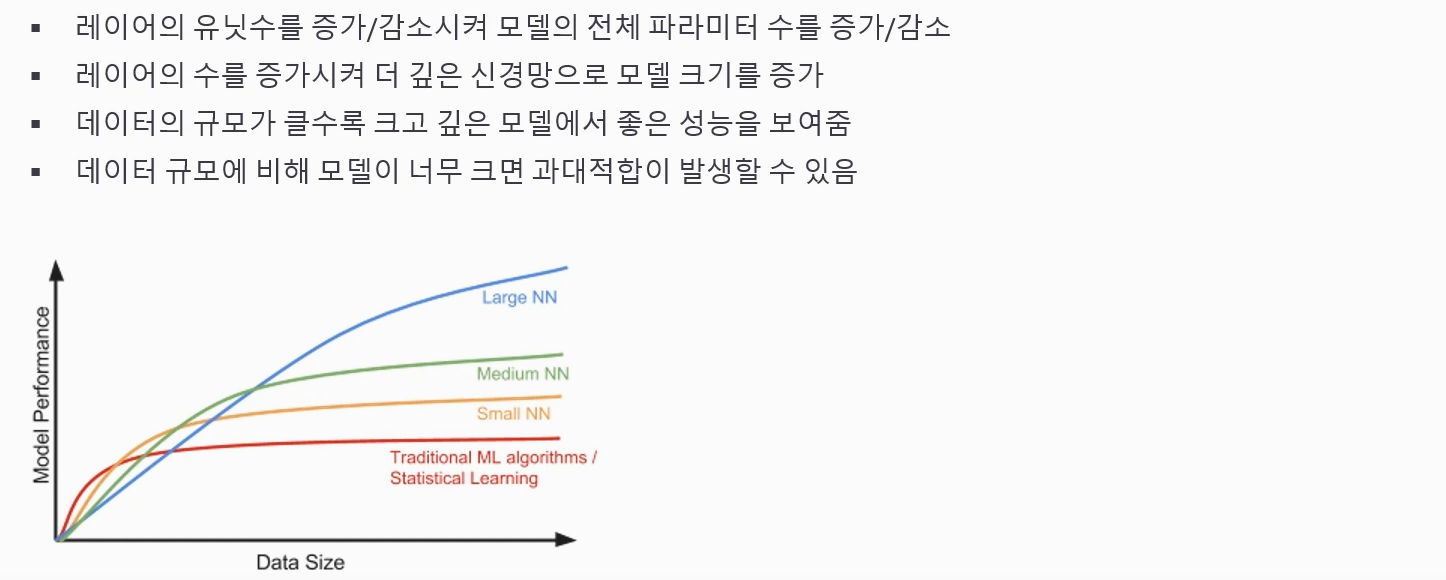
### 데이터로드 및 전처리
* 원-핫 인코딩(one-hot encoding)을 위한 함수를 정의
* imdb.load_data()를 통해 IMDB 데이터를 다운로드한 뒤, 10000 차원의 학습 데이터로 원-핫 인코딩을 수행


In [7]:
from keras.datasets import imdb
import numpy as np

def one_hot_encoding(data, dim=10000): # 아래 imdb.load_data의 num_words를 10000으로 설정할 예정이기 때문에 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 모델 구성 및 컴파일
* IMDB 데이터셋에 대해 분류하는 모델로서 기존에 정의했던 3개의 Dense 레이어를 가지는 딥러닝 모델을 정의
* rmsprop 옵티마이저, binary_crossentropy 손실 함수, accuracy 지표를 사용하도록 컴파일
-----------
* summary()를 통해 확인해보면, 모델의 전체 파라미터의 수가 1,296,769개인 것을 알 수 있다.

In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 1,296,769
Trainable params: 1,296,769
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [9]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 5s 87ms/step - loss: 0.4251 - accuracy: 0.8062 - val_loss: 0.2957 - val_accuracy: 0.8840
Epoch 2/30
49/49 [==============================] - 1s 22ms/step - loss: 0.2282 - accuracy: 0.9108 - val_loss: 0.2966 - val_accuracy: 0.8791
Epoch 3/30
49/49 [==============================] - 1s 20ms/step - loss: 0.1710 - accuracy: 0.9328 - val_loss: 0.3258 - val_accuracy: 0.8694
Epoch 4/30
49/49 [==============================] - 1s 20ms/step - loss: 0.1171 - accuracy: 0.9580 - val_loss: 0.3382 - val_accuracy: 0.8771
Epoch 5/30
49/49 [==============================] - 1s 21ms/step - loss: 0.0728 - accuracy: 0.9740 - val_loss: 0.3941 - val_accuracy: 0.8746
Epoch 6/30
49/49 [==============================] - 1s 20ms/step - loss: 0.0469 - accuracy: 0.9863 - val_loss: 0.4728 - val_accuracy: 0.8738
Epoch 7/30
49/49 [==============================] - 1s 21ms/step - loss: 0.0372 - accuracy: 0.9898 - val_loss: 0.5566 - val_accuracy: 0.8724
Epoch 8/30
49

* 모델의 지표 결과로 loss, val_loss, accuracy, val_accuracy를 차트로

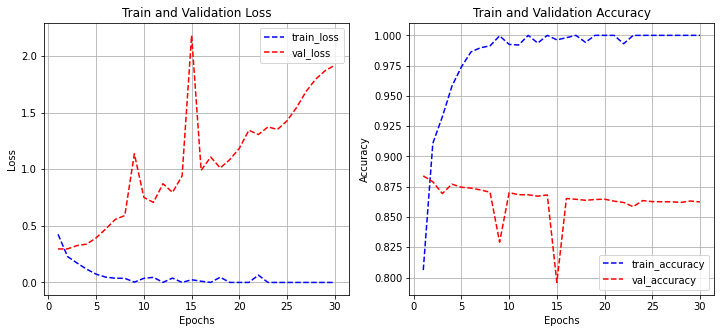

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

###  딥러닝 모델이 과대적합된 상태인 것을 알 수 있습니다. 따라서 과대적합을 해결하기 위한 방법을 찾아야합니다.

----------------
### 모델 크기 증가 해보기
* Dense 레이어의 유닛수를 128에서 2048로 크게 증가시켜서 모델의 전체 파라미터 수가 24,680,449개 됨.

In [11]:
b_model = models.Sequential()
b_model.add(layers.Dense(2048, activation='relu', input_shape=(10000, ), name='input3'))
b_model.add(layers.Dense(2048, activation='relu', name='hidden3'))
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
b_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input3 (Dense)               (None, 2048)              20482048  
_________________________________________________________________
hidden3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
output3 (Dense)              (None, 1)                 2049      
Total params: 24,680,449
Trainable params: 24,680,449
Non-trainable params: 0
_________________________________________________________________


In [12]:
b_model_history = b_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 6s 105ms/step - loss: 0.6192 - accuracy: 0.7888 - val_loss: 0.4495 - val_accuracy: 0.7939
Epoch 2/30
49/49 [==============================] - 2s 38ms/step - loss: 0.2222 - accuracy: 0.9130 - val_loss: 0.5488 - val_accuracy: 0.8026
Epoch 3/30
49/49 [==============================] - 2s 38ms/step - loss: 0.1346 - accuracy: 0.9532 - val_loss: 1.4355 - val_accuracy: 0.6730
Epoch 4/30
49/49 [==============================] - 2s 38ms/step - loss: 0.0999 - accuracy: 0.9772 - val_loss: 0.3152 - val_accuracy: 0.8861
Epoch 5/30
49/49 [==============================] - 2s 39ms/step - loss: 0.0412 - accuracy: 0.9934 - val_loss: 3.4324 - val_accuracy: 0.6255
Epoch 6/30
49/49 [==============================] - 2s 38ms/step - loss: 0.0399 - accuracy: 0.9936 - val_loss: 0.9437 - val_accuracy: 0.8450
Epoch 7/30
49/49 [==============================] - 2s 38ms/step - loss: 0.2058 - accuracy: 0.9848 - val_loss: 0.5762 - val_accuracy: 0.8636
Epoch 8/30
4

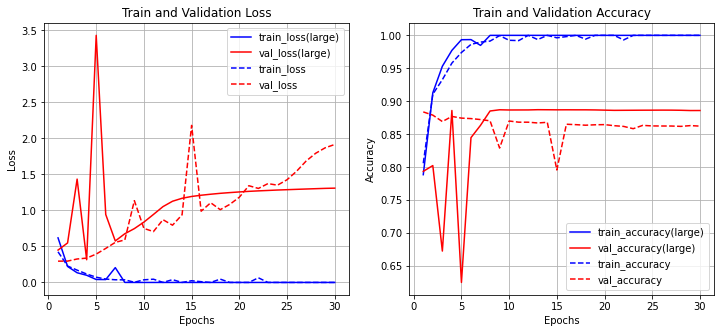

In [13]:
b_history_dict = b_model_history.history

b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1, len(b_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

* 결과를 보면, 모델의 크기가 클수록, 즉 파라미터 수가 많은 신경망일수록 빠르게 훈련 데이터 모델링이 가능하고, 학습 손실이 낮아지는 것을 알 수 있습니다. 그러나 모델이 과대적합에는 더욱 민감해지는 것을 학습-검증 데이터 손실을 통해 확인이 가능합니다.
------

### 모델 크기 감소 해보기
* Dense 레이어의 유닛수를 128대신 16으로 줄임. 즉, 모델의 크기를 줄여서 전체 파라미터의 수가 160,305개로 줄어들게 됨.

In [14]:
s_model = models.Sequential()
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2'))
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
s_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 16)                160016    
_________________________________________________________________
hidden2 (Dense)              (None, 16)                272       
_________________________________________________________________
output2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
s_model_history = s_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 5s 83ms/step - loss: 0.4583 - accuracy: 0.8235 - val_loss: 0.3466 - val_accuracy: 0.8797
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 0.2629 - accuracy: 0.9100 - val_loss: 0.2841 - val_accuracy: 0.8904
Epoch 3/30
49/49 [==============================] - 1s 20ms/step - loss: 0.2005 - accuracy: 0.9286 - val_loss: 0.2868 - val_accuracy: 0.8858
Epoch 4/30
49/49 [==============================] - 1s 19ms/step - loss: 0.1700 - accuracy: 0.9401 - val_loss: 0.2914 - val_accuracy: 0.8854
Epoch 5/30
49/49 [==============================] - 1s 20ms/step - loss: 0.1451 - accuracy: 0.9487 - val_loss: 0.3241 - val_accuracy: 0.8742
Epoch 6/30
49/49 [==============================] - 1s 19ms/step - loss: 0.1274 - accuracy: 0.9560 - val_loss: 0.3255 - val_accuracy: 0.8779
Epoch 7/30
49/49 [==============================] - 1s 21ms/step - loss: 0.1132 - accuracy: 0.9606 - val_loss: 0.3475 - val_accuracy: 0.8749
Epoch 8/30
49

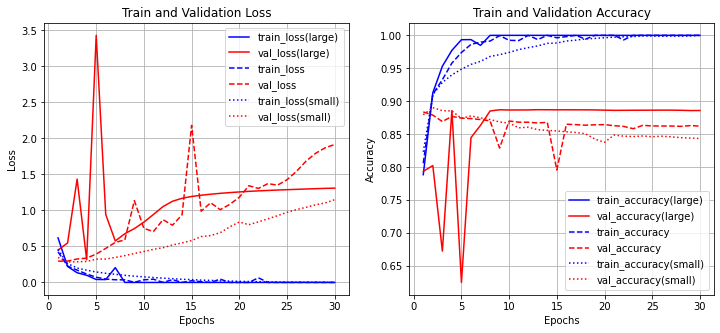

In [16]:
s_history_dict = s_model_history.history

s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

* 모델의 크기를 줄였더니 과대적합 문제에 조금 덜 민감한 것을 알 수 있습니다. 즉, 모델의 최적화를 위해서는 파라미터 수를 적절하게 조절 해야 된다는 것을 알 수 있습니다.

* 어느정도 파라미터가 적절할까요? 아래 코드를 이용해 여러분이 조절해보시기 바랍니다.

In [17]:
# [play ground]
# 원하는 분은 Dense층을 늘리거나 줄이는 등 모델의 구조 역시 변경해보시기 바랍니다.

your_model = models.Sequential()
your_model.add(layers.Dense(8, activation='relu', input_shape=(10000, ), name='input2'))
your_model.add(layers.Dense(8, activation='relu', name='hidden2'))
your_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
your_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
your_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 8)                 80008     
_________________________________________________________________
hidden2 (Dense)              (None, 8)                 72        
_________________________________________________________________
output2 (Dense)              (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________


In [18]:
your_model_history = your_model.fit(x_train, y_train, epochs=30, batch_size=512,  validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 80ms/step - loss: 0.4809 - accuracy: 0.8142 - val_loss: 0.3713 - val_accuracy: 0.8737
Epoch 2/30
49/49 [==============================] - 1s 20ms/step - loss: 0.2879 - accuracy: 0.9057 - val_loss: 0.3186 - val_accuracy: 0.8737
Epoch 3/30
49/49 [==============================] - 1s 22ms/step - loss: 0.2188 - accuracy: 0.9258 - val_loss: 0.2979 - val_accuracy: 0.8808
Epoch 4/30
49/49 [==============================] - 1s 19ms/step - loss: 0.1827 - accuracy: 0.9369 - val_loss: 0.2833 - val_accuracy: 0.8870
Epoch 5/30
49/49 [==============================] - 1s 20ms/step - loss: 0.1587 - accuracy: 0.9453 - val_loss: 0.2979 - val_accuracy: 0.8824
Epoch 6/30
49/49 [==============================] - 1s 20ms/step - loss: 0.1395 - accuracy: 0.9537 - val_loss: 0.3092 - val_accuracy: 0.8800
Epoch 7/30
49/49 [==============================] - 1s 21ms/step - loss: 0.1261 - accuracy: 0.9576 - val_loss: 0.3332 - val_accuracy: 0.8748
Epoch 8/30
49

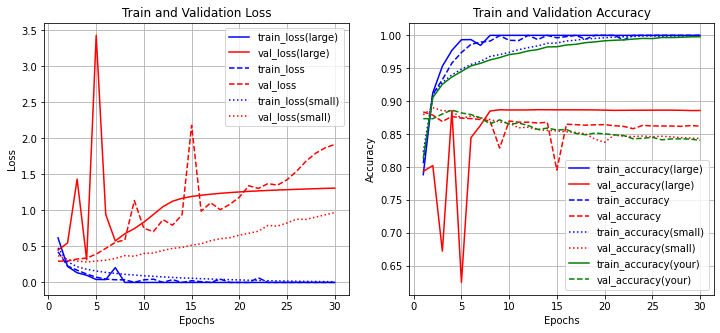

In [19]:
your_history_dict = your_model_history.history

your_loss = your_history_dict['loss']
your_val_loss = your_history_dict['val_loss']
epochs = range(1, len(your_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, your_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, your_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

your_accuracy = your_history_dict['accuracy']
your_val_accuracy = your_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.plot(epochs, your_accuracy, 'g-', label='train_accuracy(your)')
ax2.plot(epochs, your_val_accuracy, 'g--', label='val_accuracy(your)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

* 초록색 더 줄인 결과

# 9-3. 규제(Regularization)
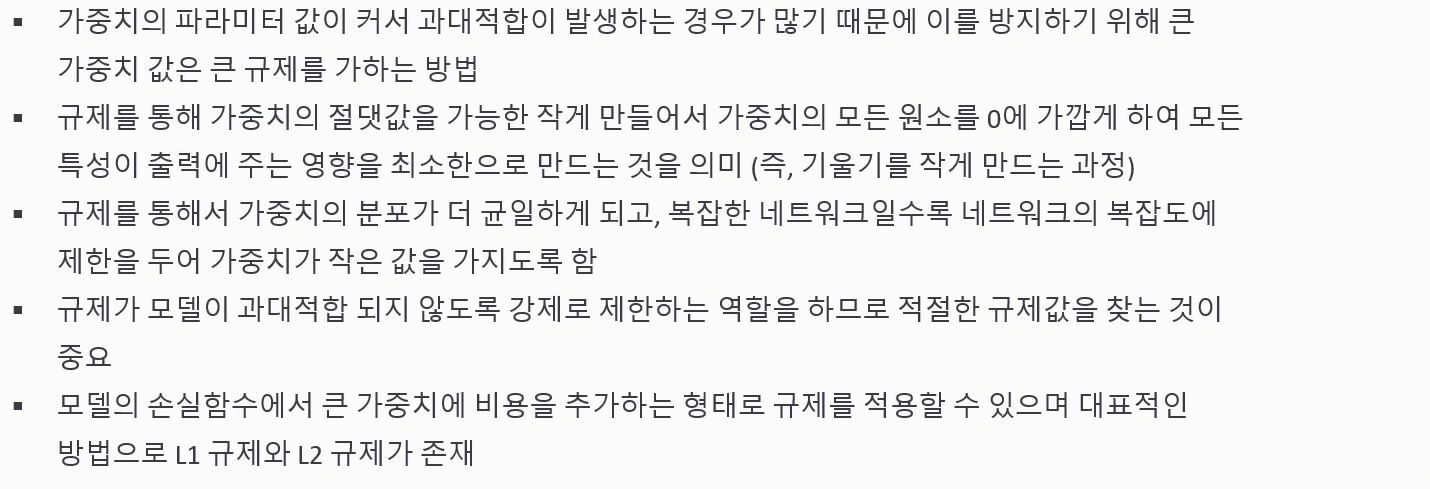
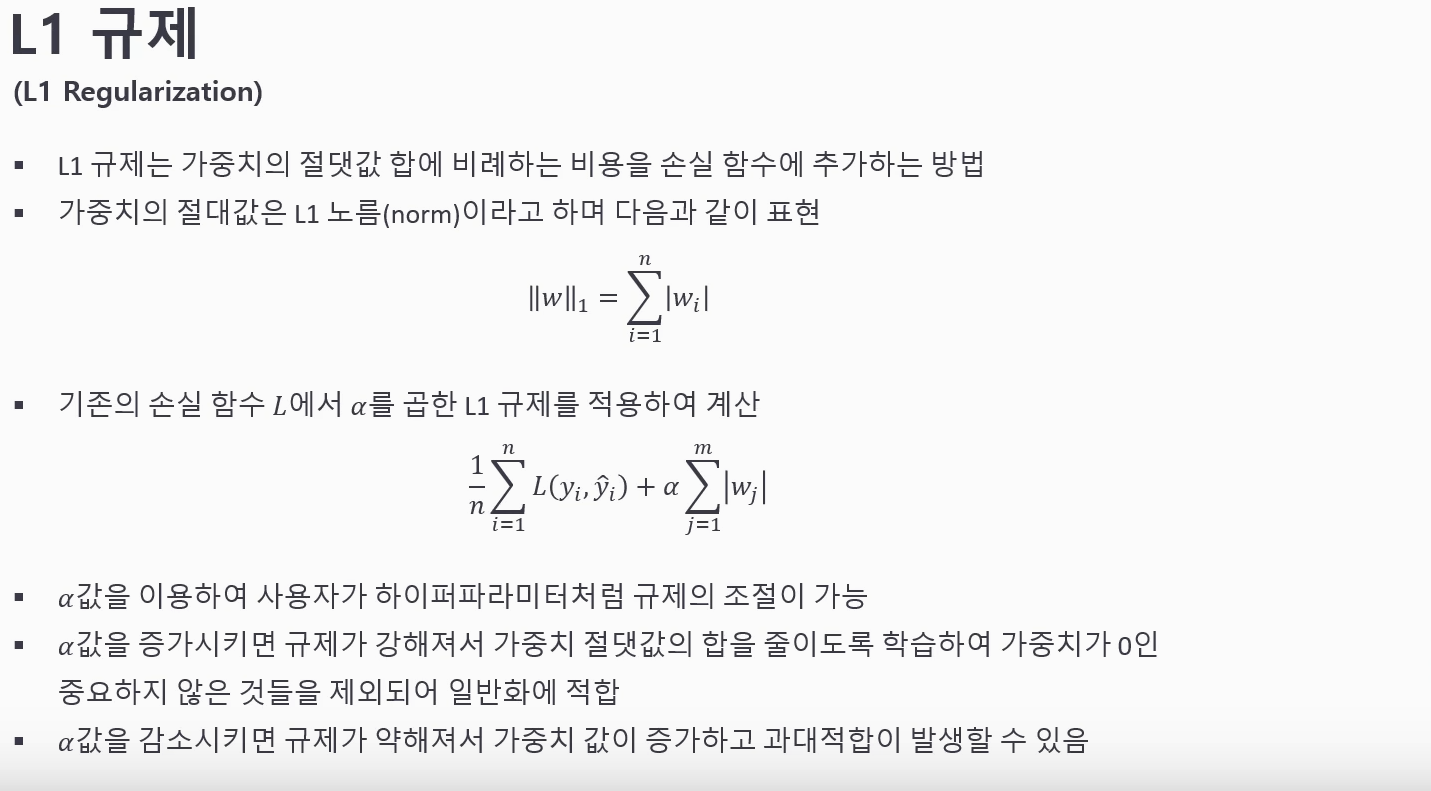
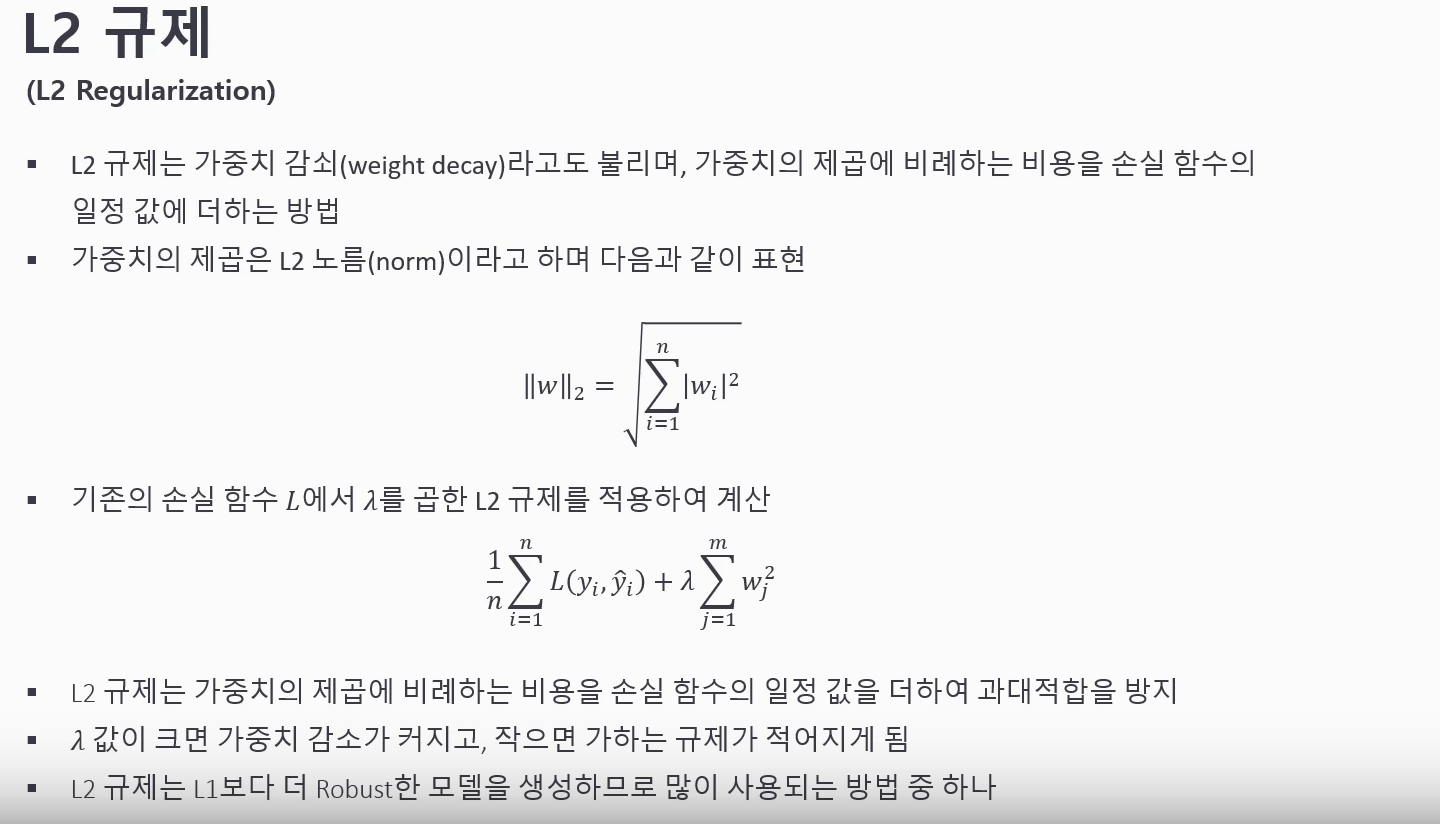

### * L1, L2 결합해서 함께 사용 하는 방법도 있음.

## L1 규제
* 케라스에서 L1 규제를 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l1으로 지정해주면 됩니다. 
* 물론 레이어에 bias_regularizer와 activity_regularizer에도 적용할 수 있습니다.

* 케라스에서 L1 규제를 사용하기 위해서는 적용할 레이어에서 가중치 정규화인 kernel_regularizer를 l1으로 지정해주면 됩니다. 
* 물론 레이어에 편향 정규화인 bias_regularizer와 출력값 정규화인 activity_regularizer에도 적용할 수 있습니다.

In [20]:
l1_model =  models.Sequential()
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu', 
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [21]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 5s 85ms/step - loss: 3.7023 - accuracy: 0.5809 - val_loss: 1.9062 - val_accuracy: 0.5387
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 1.8323 - accuracy: 0.6703 - val_loss: 1.7640 - val_accuracy: 0.7231
Epoch 3/30
49/49 [==============================] - 1s 21ms/step - loss: 1.7262 - accuracy: 0.6977 - val_loss: 1.6880 - val_accuracy: 0.7260
Epoch 4/30
49/49 [==============================] - 1s 19ms/step - loss: 1.6406 - accuracy: 0.7299 - val_loss: 1.5956 - val_accuracy: 0.7198
Epoch 5/30
49/49 [==============================] - 1s 22ms/step - loss: 1.5644 - accuracy: 0.7520 - val_loss: 1.5394 - val_accuracy: 0.7552
Epoch 6/30
49/49 [==============================] - 1s 20ms/step - loss: 1.4981 - accuracy: 0.7682 - val_loss: 1.4612 - val_accuracy: 0.7757
Epoch 7/30
49/49 [==============================] - 1s 19ms/step - loss: 1.4457 - accuracy: 0.7818 - val_loss: 1.4344 - val_accuracy: 0.7828
Epoch 8/30
49

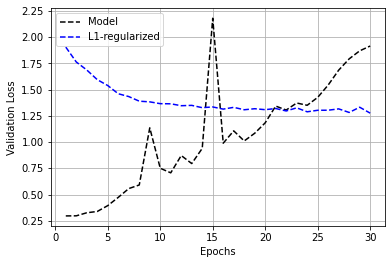

In [22]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

* 기존 모델의 결과와 L1 규제를 사용한 결과를 비교해보면, 기존 모델은 Loss 값이 점점 증가하며 과대적합의 모습을 보이는 반면, L1 규제 결과는 안정적으로 Loss 값이 감소되는 것을 알 수 있습니다.

## L2 규제
* 케라스에서 L2 규제를 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l2로 지정해주면 됩니다.

In [23]:
l2_model =  models.Sequential()
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu', 
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [24]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 5s 84ms/step - loss: 0.7434 - accuracy: 0.7912 - val_loss: 0.5979 - val_accuracy: 0.8728
Epoch 2/30
49/49 [==============================] - 1s 21ms/step - loss: 0.5463 - accuracy: 0.8782 - val_loss: 0.5388 - val_accuracy: 0.8632
Epoch 3/30
49/49 [==============================] - 1s 19ms/step - loss: 0.4962 - accuracy: 0.8842 - val_loss: 0.4979 - val_accuracy: 0.8760
Epoch 4/30
49/49 [==============================] - 1s 19ms/step - loss: 0.4620 - accuracy: 0.8917 - val_loss: 0.4815 - val_accuracy: 0.8740
Epoch 5/30
49/49 [==============================] - 1s 20ms/step - loss: 0.4448 - accuracy: 0.8911 - val_loss: 0.4571 - val_accuracy: 0.8815
Epoch 6/30
49/49 [==============================] - 1s 20ms/step - loss: 0.4288 - accuracy: 0.8934 - val_loss: 0.4794 - val_accuracy: 0.8624
Epoch 7/30
49/49 [==============================] - 1s 21ms/step - loss: 0.4186 - accuracy: 0.8952 - val_loss: 0.4394 - val_accuracy: 0.8830
Epoch 8/30
49

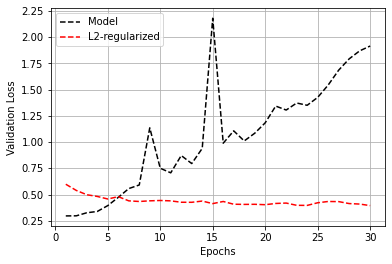

In [25]:
l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

L2 규제 방법은 기존 모델 결과와 비교해 Loss 값이 매우 낮게 감소되어 과대적합 문제를 해결하는 것을 알 수 있습니다.

## L1 L2 규제
* 케라스에서 L1과 L2 규제를 같이 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l1_l2로 지정해주면 됩니다.

In [26]:
l1_l2_model =  models.Sequential()
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu', input_shape=(10000, )))
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [27]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 10s 192ms/step - loss: 3.9186 - accuracy: 0.6025 - val_loss: 2.0755 - val_accuracy: 0.6302
Epoch 2/30
49/49 [==============================] - 1s 21ms/step - loss: 1.9819 - accuracy: 0.7015 - val_loss: 1.9064 - val_accuracy: 0.6384
Epoch 3/30
49/49 [==============================] - 1s 22ms/step - loss: 1.8446 - accuracy: 0.7312 - val_loss: 1.7883 - val_accuracy: 0.7534
Epoch 4/30
49/49 [==============================] - 1s 19ms/step - loss: 1.7254 - accuracy: 0.7539 - val_loss: 1.6692 - val_accuracy: 0.7315
Epoch 5/30
49/49 [==============================] - 1s 19ms/step - loss: 1.6255 - accuracy: 0.7676 - val_loss: 1.5876 - val_accuracy: 0.7539
Epoch 6/30
49/49 [==============================] - 1s 20ms/step - loss: 1.5431 - accuracy: 0.7812 - val_loss: 1.5052 - val_accuracy: 0.7772
Epoch 7/30
49/49 [==============================] - 1s 21ms/step - loss: 1.4791 - accuracy: 0.7898 - val_loss: 1.4562 - val_accuracy: 0.7933
Epoch 8/30


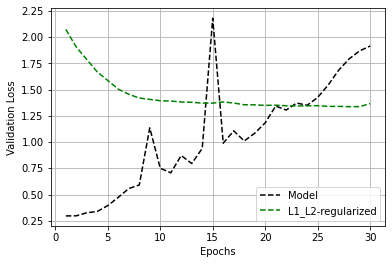

In [28]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

L1 L2 규제를 함께 사용하는 경우는 L1 규제와 큰 차이가 없는 것을 알 수 있습니다.
전체 규제 방법들을 다 비교해보면, L2 규제가 가장 좋은 결과를 보여주고 있습니다. 물론 어떤 모델에 어떤 규제 방법이 좋을지는 실험을 통해 찾아가는 과정이 필요합니다.

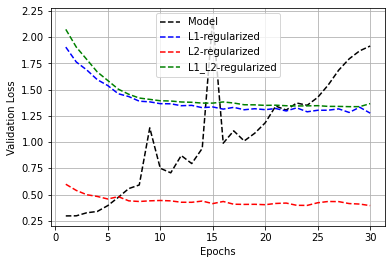

In [29]:
epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

위에서 다양한 종류의 규제를 사용해 보았지만 영상에서도 언급했듯이 큰 규제 값을 줄 수도 있고 작은 규제 값을 줄 수도 있습니다. 위에서 실험한 결과 가장 좋아 보인 L2 규제라도 어떤 규제 값을 주느냐에 따라 결과가 달라질 것입니다. 이 부분은 여러분이 kernel_regularizaer 부분을 직접 변경해가며 찾아보시죠. 여러분의 val_loss는 노란색으로 표시했습니다.

In [30]:
# # [play ground]
# # L2 규제의 기본 값은 0.01입니다. 여러분이 원하는 크기로 조절해보세요. 혹은 다른 규제를 사용하셔도 됩니다.

# your_model =  models.Sequential()
# your_model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l2(# [[YOUR CODE]]), activation='relu', input_shape=(10000, )))
# your_model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l2(# [[YOUR CODE]]), activation='relu'))
# your_model.add(layers.Dense(1, activation='sigmoid'))
# your_model.compile(optimizer='rmsprop',
#                     loss='binary_crossentropy',
#                     metrics=['accuracy'])
# your_model.summary()

In [31]:
# your_model_hist = your_model.fit(x_train, y_train,
#                                  epochs=30,
#                                  batch_size=512,
#                                  validation_data=(x_test, y_test))

In [32]:
# your_val_loss = your_model_hist.history['val_loss']

# epochs = range(1, 31)
# plt.plot(epochs, val_loss, 'k--', label='Model')
# plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
# plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
# plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
# plt.plot(epochs, your_val_loss, 'y--', label='Your L2-regularized')
# plt.xlabel('Epochs')
# plt.ylabel('Validation Loss')
# plt.legend()
# plt.grid()
# plt.show()

# 9-4. 드롭아웃(Dropout)

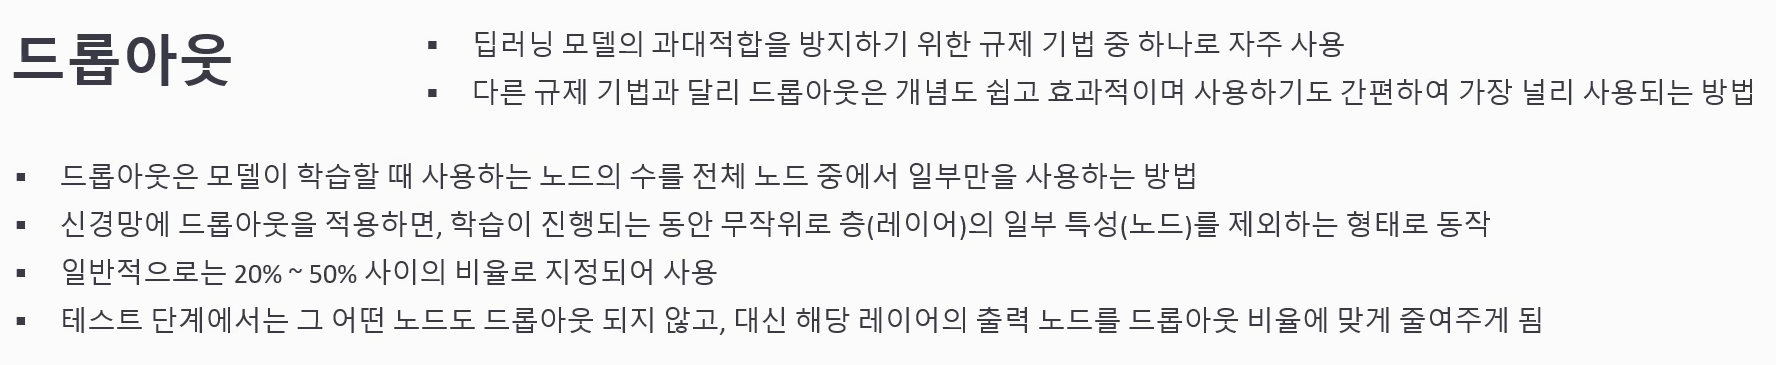

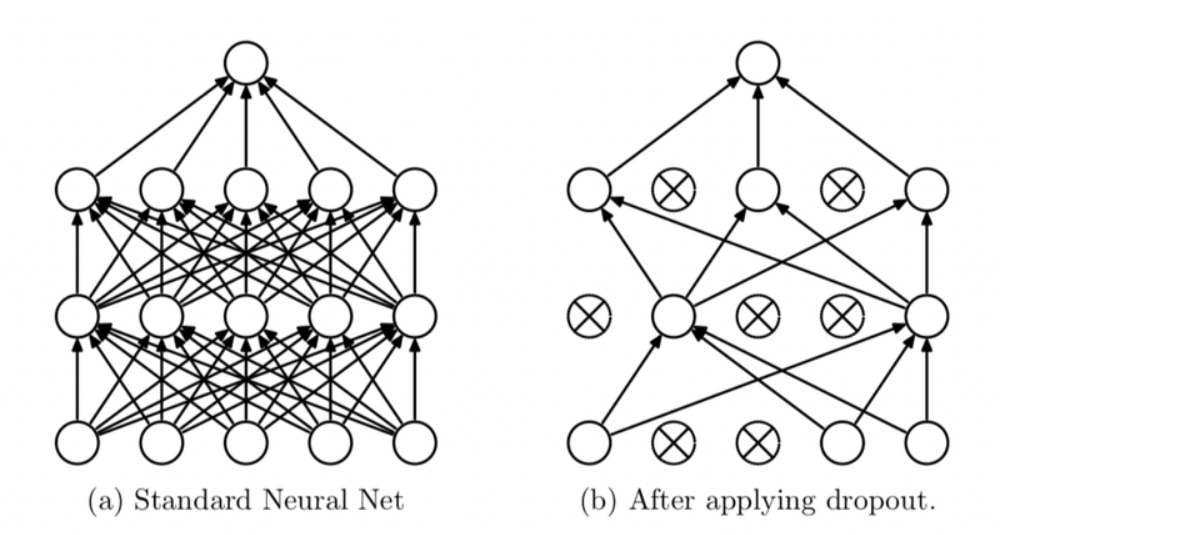

### 드롭아웃 (20%)
* 드롭아웃이 포함된 딥러닝 모델을 정의하기 위해 기존 모델에서 사용한 구조에서 적절한 위치에 드롭아웃 레이어를 추가해야 합니다.
* 먼저 첫번째 레이어와 두번째 레이어 사이에 Dropout 레이어를 추가하는데, 20% 정도만 적용하기 위해서 0.2로 지정해줍니다. 
* 마찬가지로 기존 두번째 레이어와 세번째 레이어 사이에 20%로 적용한 Dropout 레이어를 추가합니다.

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


* 기존 모델과 어떤 차이가 나는지 비교하기 위해 학습 히스토리를 별도로 저장

In [ ]:
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
46/49 [===========================>..] - ETA: 0s - loss: 0.5007 - accuracy: 0.7715

*기존 모델의 히스토리 결과와 드롭아웃을 20% 적용한 히스토리 결과를 각각 비교하기 위해 차트로 시각화

In [ ]:
drop_20_dict = drop_20_history.history

drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 드롭아웃 (50%)
기존 모델보다 드롭아웃 비중을 50%로 증가시키기 위해 Dropout 레이어에서 0.2로 지정된 값을 0.5로 증가시켜 줍니다.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

* 마찬가지로 모델별로 비교를 위해서 학습 히스토리를 별도로 저장합니다.

In [ ]:
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

* 드롭아웃이 없는 모델과 드롭아웃을 20% 적용한 모델, 그리고 드롭아웃을 50% 적용한 모델의 히스토리 결과를 각각 비교하기 위해 차트로 시각화합니다.

In [ ]:
drop_50_dict = drop_50_history.history

drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()